In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df_512 = pd.read_csv("32/1_512.csv")
df_1024 = pd.read_csv("32/1_1024.csv")
df = pd.concat([df_512, df_1024], ignore_index=True)
df.head()

,Algoritmo,n,Keygen_us,Keygen_ciclos,Sign_us,Sign_ciclos,Verify_us,Verify_ciclos
0,ML-DSA-44,512,4568,13223739,283,818960,84,241773
1,ML-DSA-44,512,182,527423,351,1017001,87,252242
2,ML-DSA-44,512,172,497524,281,814582,83,240759
3,ML-DSA-44,512,208,604157,227,656994,84,241513
4,ML-DSA-44,512,169,488708,231,669002,87,251662


In [27]:
df["Keygen_us"] = pd.to_numeric(df["Keygen_us"], errors='coerce')
df["Sign_us"] = pd.to_numeric(df["Sign_us"], errors='coerce')
df["Verify_us"] = pd.to_numeric(df["Verify_us"], errors='coerce')

In [28]:
df = df[df.n==512]

In [30]:
df_largo = df.melt(id_vars=["Algoritmo"], 
                   value_vars=["Keygen_us", "Sign_us", "Verify_us"],
                   var_name="Fase", 
                   value_name="Tiempo (μs)")
df["Keygen_us"] = np.log10(df["Keygen_us"])
df["Sign_us"] = np.log10(df["Sign_us"])
df["Verify_us"] = np.log10(df["Verify_us"])

C:\Users\Cristian Nina\AppData\Local\Temp\ipykernel_27468\3616405281.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_largo, x="Fase", y="Tiempo (μs)", hue="Algoritmo", ci=None)  # o ci=None


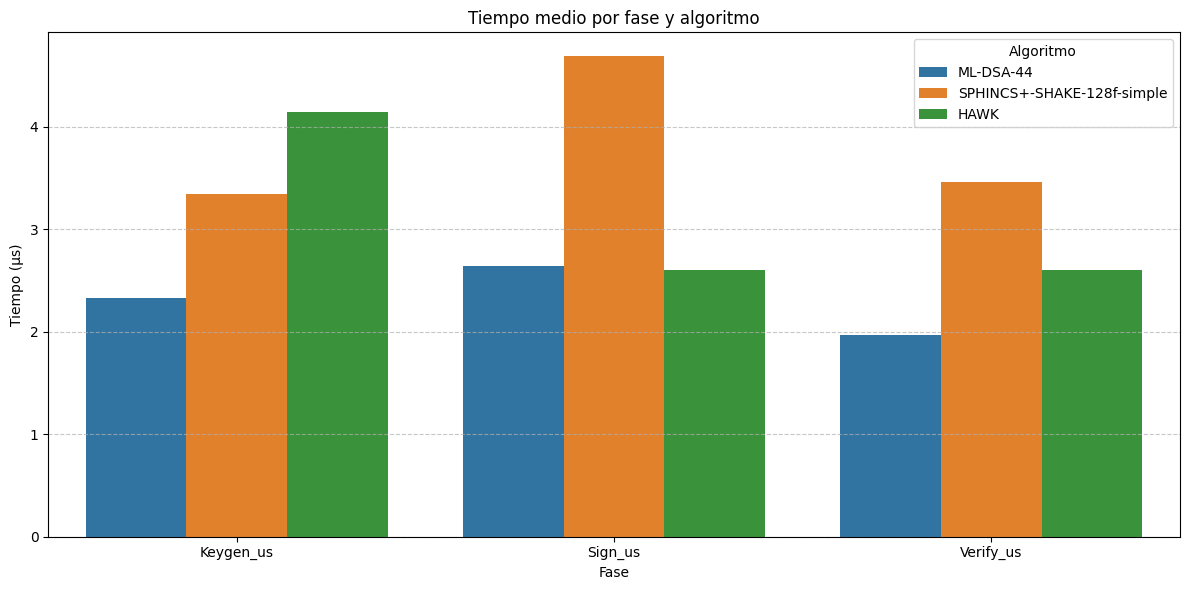

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_largo, x="Fase", y="Tiempo (μs)", hue="Algoritmo", ci=None)  # o ci=None
plt.title("Tiempo medio por fase y algoritmo")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df_32_1_512 = pd.read_csv("32/1_512.csv")
df_32_1_512.head()

,Algoritmo,n,Keygen_us,Keygen_ciclos,Sign_us,Sign_ciclos,Verify_us,Verify_ciclos
0,ML-DSA-44,512,4568,13223739,283,818960,84,241773
1,ML-DSA-44,512,182,527423,351,1017001,87,252242
2,ML-DSA-44,512,172,497524,281,814582,83,240759
3,ML-DSA-44,512,208,604157,227,656994,84,241513
4,ML-DSA-44,512,169,488708,231,669002,87,251662


In [14]:
ciclos_df = df_32_1_512[["Algoritmo", "Keygen_ciclos", "Sign_ciclos", "Verify_ciclos"]]
df_melted = ciclos_df.melt(id_vars="Algoritmo", 
                           var_name="Fase", 
                           value_name="Ciclos")
df_melted.head()

,Algoritmo,Fase,Ciclos
0,ML-DSA-44,Keygen_ciclos,13223739
1,ML-DSA-44,Keygen_ciclos,527423
2,ML-DSA-44,Keygen_ciclos,497524
3,ML-DSA-44,Keygen_ciclos,604157
4,ML-DSA-44,Keygen_ciclos,488708


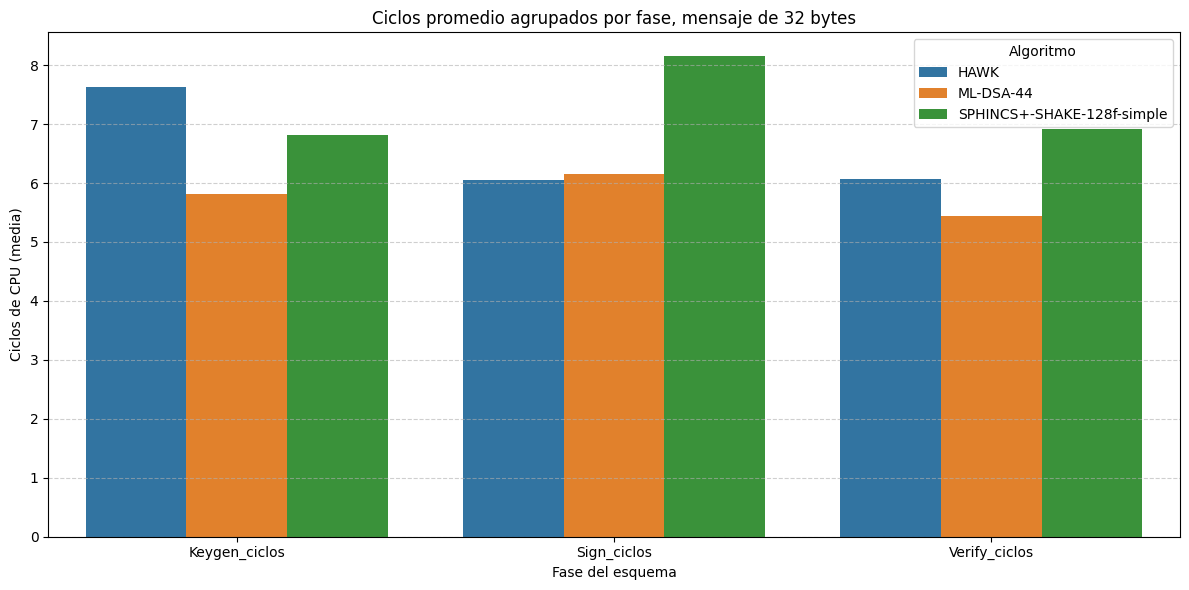

In [ ]:

agg_df = (
    df_32_1_512.groupby("Algoritmo")[["Keygen_ciclos", "Sign_ciclos", "Verify_ciclos"]]
      .mean() 
      .reset_index()
)
agg_df[["Keygen_ciclos", "Sign_ciclos", "Verify_ciclos"]] = \
    np.log10(agg_df[["Keygen_ciclos", "Sign_ciclos", "Verify_ciclos"]])
df_largo = agg_df.melt(id_vars="Algoritmo",
                       var_name="Fase",
                       value_name="Ciclos")
df_largo["Fase"] = df_largo["Fase"].str.replace("Ciclos_", "")
plt.figure(figsize=(12, 6))
sns.barplot(data=df_largo, x="Fase", y="Ciclos", hue="Algoritmo")

plt.title("Ciclos promedio agrupados por fase, mensaje de 32 bytes")
plt.ylabel("Ciclos de CPU (media)")
plt.xlabel("Fase del esquema")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [2]:
def obtener_id(x):
    if x == 1:
        return "32/1_512.csv", "32/1_1024.csv", "1024/1_512.csv", "1024/1_1024.csv"
    elif x == 2:
        return "32/2_512.csv", "32/2_1024.csv", "1024/2_512.csv", "1024/2_1024.csv"
    else:
        print("Error: ID no reconocido")

In [3]:
def plot_ciclos(id):
    df = pd.read_csv(id)

    ciclos_df = df[["Algoritmo", "Keygen_ciclos", "Sign_ciclos", "Verify_ciclos"]]
    #df_melted = ciclos_df.melt(id_vars="Algoritmo", var_name="Fase", value_name="Ciclos")

    agg_df = (
        df.groupby("Algoritmo")[["Keygen_ciclos", "Sign_ciclos", "Verify_ciclos"]]
          .mean()
          .reset_index()
    )
    agg_df[["Keygen_ciclos", "Sign_ciclos", "Verify_ciclos"]] = \
        np.log10(agg_df[["Keygen_ciclos", "Sign_ciclos", "Verify_ciclos"]])

    df_largo = agg_df.melt(id_vars="Algoritmo",
                           var_name="Fase",
                           value_name="Ciclos")
    df_largo["Algoritmo"] = pd.Categorical(df_largo["Algoritmo"], categories=sorted(df_largo["Algoritmo"].unique()), ordered=True)

    medias = df_largo.groupby(["Algoritmo", "Fase"])["Ciclos"].mean().reset_index()
    
    # Imprimir
    print("🧮 Ciclos medios por algoritmo y fase:")
    print(medias.to_string(index=False))
    df_largo["Fase"] = df_largo["Fase"].replace({
        "Keygen_ciclos": "Generación de clave",
        "Sign_ciclos": "Firma",
        "Verify_ciclos": "Verificación"
    })
    plt.figure(figsize=(12, 6))

    sns.barplot(data=df_largo, x="Fase", y="Ciclos", hue="Algoritmo")
    id = id.split("/")[0]# Extraer el ID del mensaje de bytes
    plt.title(f"Ciclos promedio agrupados por fase, mensaje de {id} bytes")
    plt.ylabel("Ciclos de CPU (media)")
    plt.xlabel("Fase del esquema")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

In [4]:
def plot_tiempo(id):
    df = pd.read_csv(id)

    df["Keygen_us"] = pd.to_numeric(df["Keygen_us"], errors='coerce')
    df["Sign_us"] = pd.to_numeric(df["Sign_us"], errors='coerce')
    df["Verify_us"] = pd.to_numeric(df["Verify_us"], errors='coerce')

    df_largo = df.melt(id_vars=["Algoritmo"], 
                       value_vars=["Keygen_us", "Sign_us", "Verify_us"],
                       var_name="Fase", 
                       value_name="Tiempo (μs)")
    # Calcular la media por Algoritmo y Fase
    df_largo["Algoritmo"] = pd.Categorical(df_largo["Algoritmo"], categories=sorted(df_largo["Algoritmo"].unique()), ordered=True)
    medias = df_largo.groupby(["Algoritmo", "Fase"])["Tiempo (μs)"].mean().reset_index()
    
    # Imprimir
    print("🧮 Tiempo medio (log10 μs) por algoritmo y fase:")
    print(medias.to_string(index=False))
    df_largo["Tiempo (μs)"] = np.log10(df_largo["Tiempo (μs)"])
    df_largo["Fase"] = df_largo["Fase"].replace({
        "Keygen_us": "Generación de clave",
        "Sign_us": "Firma",
        "Verify_us": "Verificación"
    })
    #print(df_largo.head())
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_largo, x="Fase", y="Tiempo (μs)", hue="Algoritmo", ci=None)
    id = id.split("/")[0]# Extraer el ID del mensaje de bytes
    plt.title(f"Tiempo medio por fase y algoritmo, mensaje de {id} bytes")
    plt.ylabel("log10 del tiempo (μs)")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

In [5]:
def plotear(x,y =None,type = None):
    print("El orden es NIST-1-32,NIST-V-32,NIST-1-1024,NIST-V-1024")
    id = obtener_id(x)
    var1 = True
    var2 = True
    if type:
        if type == "ciclos":
            var1 = False
        elif type == "tiempo":
            var2 = False
        else:
            print("Error: Tipo no reconocido. Usa 'ciclos' o 'tiempo'.")
            return
    contador = 0
    for id in obtener_id(x):
        contador += 1
        if y and contador != y:
            continue
        if var2:
            plot_ciclos(id)
        if var1:
            plot_tiempo(id)

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

El orden es NIST-1-32,NIST-V-32,NIST-1-1024,NIST-V-1024
🧮 Tiempo medio (log10 μs) por algoritmo y fase:
  Algoritmo      Fase  Tiempo (μs)
Falcon-1024 Keygen_us 16837.167333
Falcon-1024   Sign_us   628.064667
Falcon-1024 Verify_us    76.418000
       HAWK Keygen_us 65889.061667
       HAWK   Sign_us   863.582333
       HAWK Verify_us   876.835667
  ML-DSA-87 Keygen_us   353.674667
  ML-DSA-87   Sign_us   810.422333
  ML-DSA-87 Verify_us   234.524000


C:\Users\Cristian Nina\AppData\Local\Temp\ipykernel_24300\1129439392.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medias = df_largo.groupby(["Algoritmo", "Fase"])["Tiempo (μs)"].mean().reset_index()
C:\Users\Cristian Nina\AppData\Local\Temp\ipykernel_24300\1129439392.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_largo, x="Fase", y="Tiempo (μs)", hue="Algoritmo", ci=None)


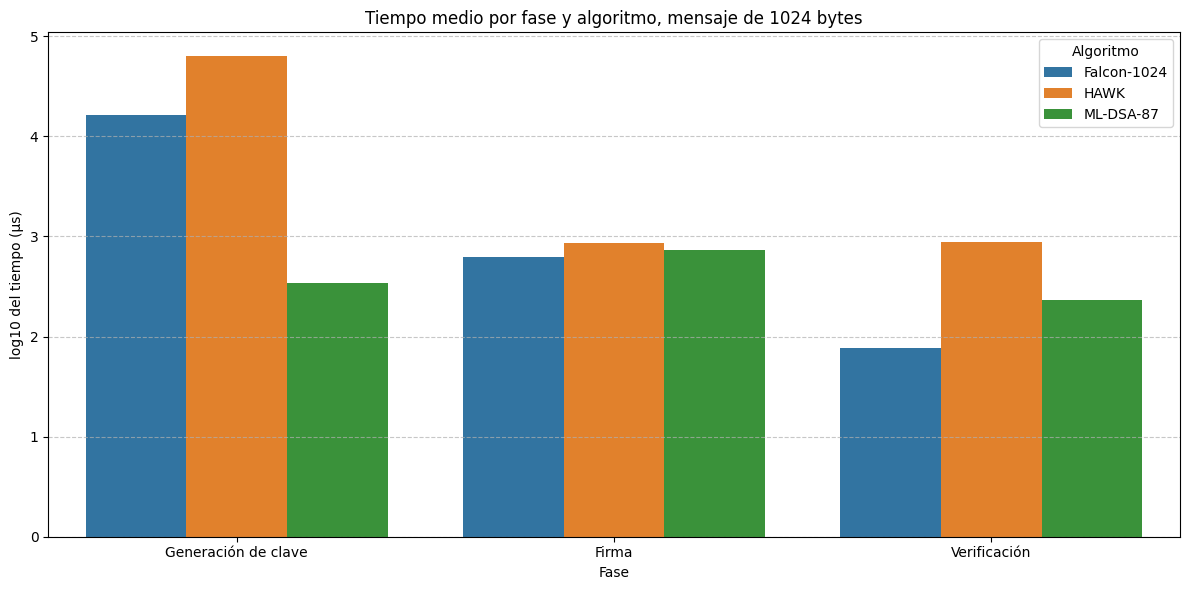

In [26]:
plotear(2,4,"tiempo")

El orden es NIST-1-32,NIST-V-32,NIST-1-1024,NIST-V-1024
🧮 Ciclos medios por algoritmo y fase:
 Algoritmo          Fase   Ciclos
Falcon-512 Keygen_ciclos 7.245255
Falcon-512   Sign_ciclos 6.075826
Falcon-512 Verify_ciclos 5.080629
      HAWK Keygen_ciclos 7.618911
      HAWK   Sign_ciclos 6.055355
      HAWK Verify_ciclos 6.067496
 ML-DSA-44 Keygen_ciclos 5.759657
 ML-DSA-44   Sign_ciclos 6.115710
 ML-DSA-44 Verify_ciclos 5.423684


C:\Users\Cristian Nina\AppData\Local\Temp\ipykernel_24300\1502587098.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medias = df_largo.groupby(["Algoritmo", "Fase"])["Ciclos"].mean().reset_index()


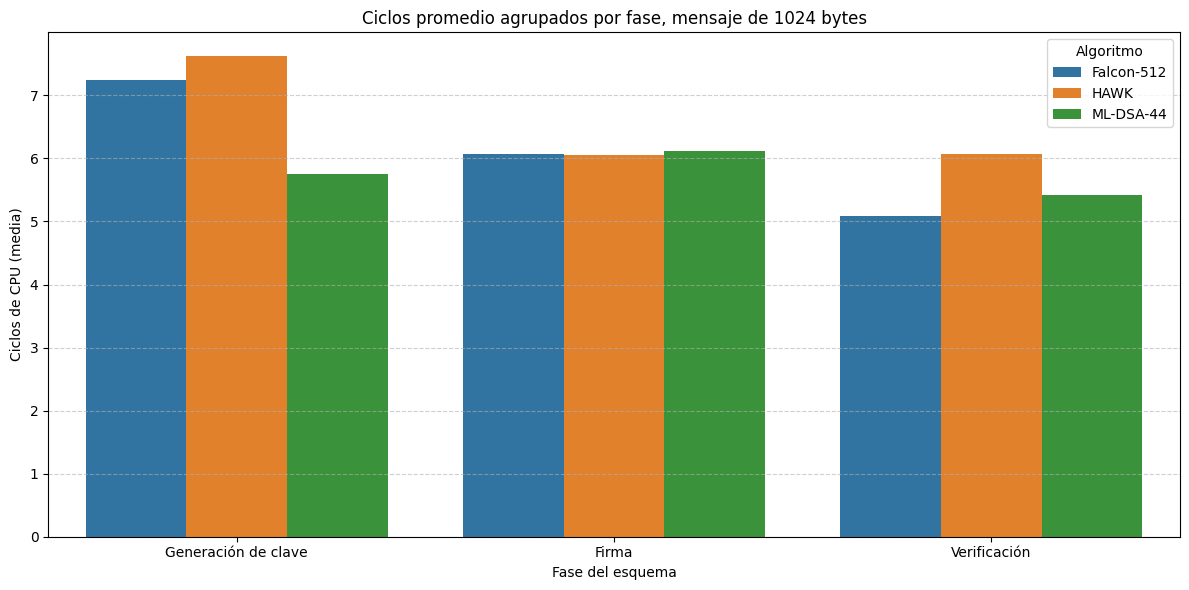

In [ ]:
plotear(2,2,"ciclos")